**FLO RFM Segmentation Project**

**Author:** Oğuz Erdoğan

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width',1000)

# Section I - Data Understanding

### Step #1 
Read Data

In [3]:
df_ = pd.read_csv("data/flo_data_20K.csv")
df = df_.copy()

### Step #2
Exploratory Data Analysis

In [4]:
# First 5 rows
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [5]:
# Check columns
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [6]:
# Check data size
df.shape

(19945, 12)

In [7]:
# Describe numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


In [8]:
# Missing values
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [9]:
# Check variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

### Step #3

Omnichannel means that customers shop both online and offline.

Create new variables for the total number of purchases and spending of each customer.

In [10]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

### Step #4
Examine variable types. Change the type of variables that express date to date.

In [11]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

### Step #5
Analyze, according to shopping channels;
- Total number of customers,
- Total number of products received
- Total expenditures 

In [12]:
df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total":"sum",
                                 "customer_value_total":"sum"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


### Step #6
-  List the top 10 most profitable customers.
-  List the top 10 customers who placed the most orders.

In [13]:
# 1. most profitable customers.
df.sort_values("customer_value_total", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15


In [14]:
# 2. most ordered users
df.sort_values("order_num_total", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57


### Step #7
Functionalize the data preparation process.

In [15]:
def data_prep(dataframe):
    dataframe["order_num_total"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    return df

# Section II - Preparing RFM Table

### Step #1

Date 2 days after the date of the last purchase in the dataset

In [17]:
df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021,6,1)

### Step #2
Prepare RFM columns
- Customer Id
- Recenc
- Frequency
- Monetary


In [18]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]')
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98


# Section III - Calculating RF and RFM Scores

### Step #1

Converting Recency, Frequency and Monetary metrics into scores between 1-5

In [19]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [20]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1


### Step #2
Expressing `recency_score` and `frequency_score` as a single variable and saving as `RF_SCORE`

In [21]:
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

### Step #3
Express `recency_score` and `frequency_score` and `monetary_score` as a single variable and save as `RFM_SCORE`


In [22]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

### Step #4
Identification of RF Scores as Segments

In [23]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [24]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31,311,about_to_sleep


### Step #5
Analyzing segments 

In [25]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       113.79  1629      2.40  1629   359.01  1629
at_Risk              241.61  3131      4.47  3131   646.61  3131
cant_loose           235.44  1200     10.70  1200  1474.47  1200
champions             17.11  1932      8.93  1932  1406.63  1932
hibernating          247.95  3604      2.39  3604   366.27  3604
loyal_customers       82.59  3361      8.37  3361  1216.82  3361
need_attention       113.83   823      3.73   823   562.14   823
new_customers         17.92   680      2.00   680   339.96   680
potential_loyalists   37.16  2938      3.30  2938   533.18  2938
promising             58.92   647      2.00   647   335.67   647

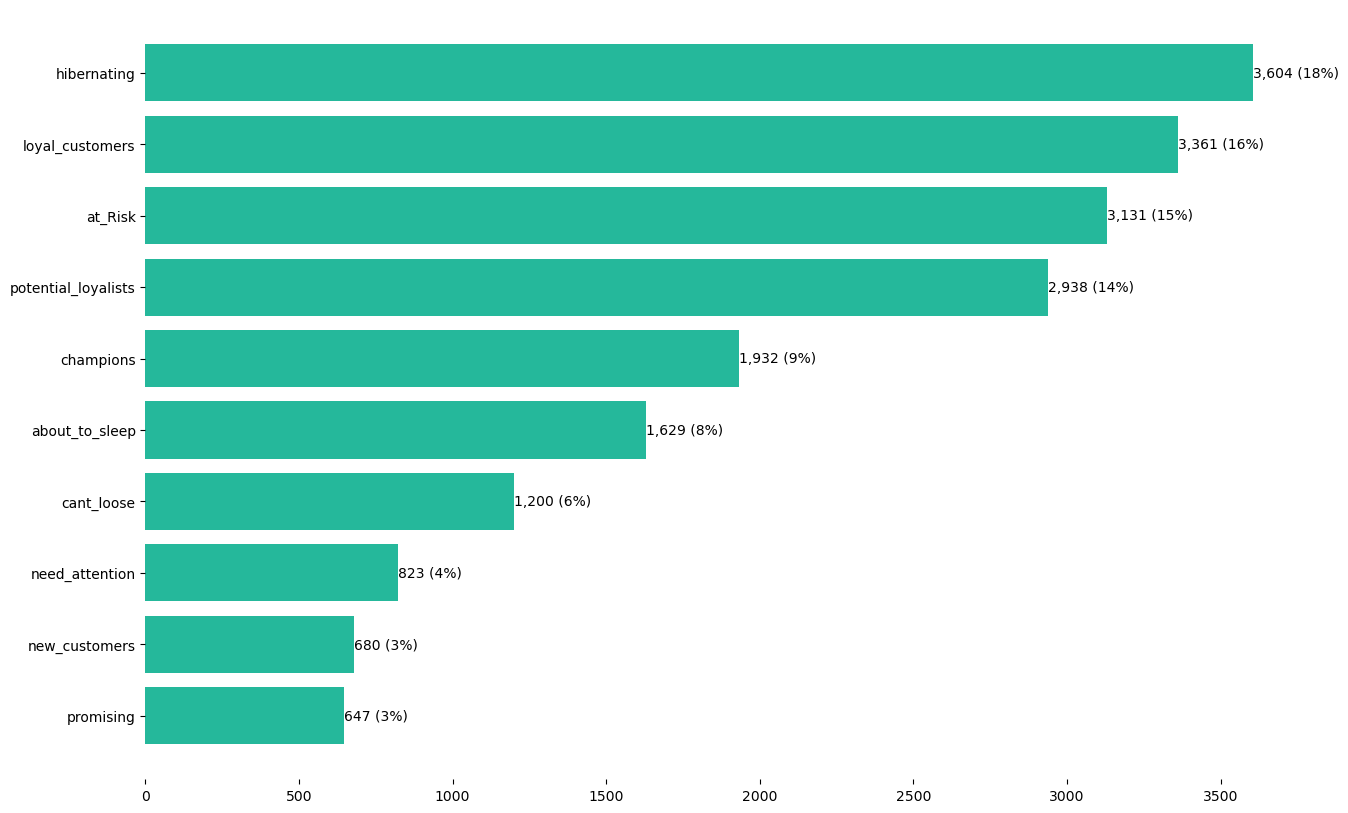

In [26]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15,10))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='#25B89B')
ax.set_frame_on(False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Section IV - Business Problems

### Case #1

FLO includes a new women's shoe brand in its organization. 

The product prices of the brand are above the general customer preferences. 

For this reason, it is desired to contact customers who will be interested in the promotion of the brand and product sales. 

These customers are planned to be loyal, above 250 TL on average and shopping in the women's category. 

Save the id numbers of these customers in csv file.

In [27]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & (df["customer_value_total"]/df["order_num_total"] > 250)&(df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
cust_ids.to_csv("output/new_brand_customers.csv", index=False)
cust_ids.shape

(148,)

### Case #2
Up to 40% discount is planned for Men's and Children's products.

With this discount, we want to specifically target customers who are interested in the relevant categories, who have been good customers in the past but have not shopped for a long time and new customers.

Save the ids of the customers in the appropriate profile to csv file.

In [28]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["cant_loose","hibernating","new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK"))|(df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
cust_ids.to_csv("output/discount_customers.csv", index=False)